In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles
from rna_motif_library.plotting import publication_style_ax
from rna_motif_library.util import parse_motif_name

In [2]:
df = pd.read_json("../dssr_motifs_compared.json")

In [3]:
len(df)

1343222

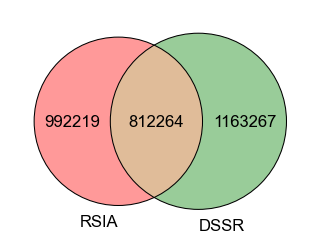

In [4]:
fig, ax = plt.subplots(figsize=(2.5, 2.5), dpi=150)
in_our_db = len(df[df["in_our_db"] == True])
in_other_db = len(df[df["in_other_db"] == True])
overlap = len(df[(df["in_our_db"] == True) & (df["in_other_db"] == True)])
# print(in_our_db, in_other_db, overlap)
v = venn2(subsets=(in_our_db, in_other_db, overlap), set_labels=("RSIA", "DSSR"))
c = venn2_circles(subsets=(in_our_db, in_other_db, overlap), linestyle="solid", lw=0.5)
publication_style_ax(ax)

In [5]:
df["in_tc"] = df["in_tc"].fillna(False)

In [6]:
df["n_contained_in_motifs"] = df["contained_in_motifs"].apply(len)
df["n_overlapping_motifs"] = df["overlapping_motifs"].apply(len)

In [7]:
df_dssr = df.query("in_our_db == False").copy()
df_dssr["reason"] = ""
df_dssr.loc[
    (df_dssr["correct_n_strands"] == False) & (df_dssr["reason"] == ""), "reason"
] = "Incorrect number of strands"
df_dssr.loc[
    (df_dssr["correct_n_basepairs"] == False) & (df_dssr["reason"] == ""), "reason"
] = "Incorrect number of basepairs"
df_dssr.loc[
    (df_dssr["has_singlet_flank"] == True) & (df_dssr["reason"] == ""), "reason"
] = "Has singlet flank"
df_dssr.loc[(df_dssr["in_tc"] == True) & (df_dssr["reason"] == ""), "reason"] = (
    "In tertiary contact"
)
df_dssr.loc[
    (df_dssr["n_contained_in_motifs"] > 0) & (df_dssr["reason"] == ""), "reason"
] = "Contained in motif"
df_dssr.loc[
    (df_dssr["n_overlapping_motifs"] > 0) & (df_dssr["reason"] == ""), "reason"
] = "Combination of smaller motifs"

In [8]:
df_test = df.query("in_tc == True").copy()
print(df_test["motif"].values)

['HELIX-CAGGGU-GCCCUG-2HO6-1' 'HELIX-UCCUGC-GCAGGA-2HO6-1'
 'NWAY-GG-UGAC-GAGACAUC-2HO6-1' ... 'SSTRAND-GC-5HCP-1'
 'SSTRAND-GU-5HCP-2' 'SSTRAND-A-5HCP-12']


In [9]:
row = df_test.query("motif == 'HELIX-CAGGGU-GCCCUG-2HO6-1'").iloc[0]
row["overlapping_motifs"]

['HAIRPIN-12-AGGGCAGGGUUUAU-2HO6-1', 'SSTRAND-9-GGUGCCCUG-2HO6-1']

In [14]:
df_test = df.query("correct_n_basepairs == False")
df_test["motif"].values[100:120]

array(['HELIX-XUCUU-GAGAC-8OVE-1', 'HELIX-AA-UX-8OVE-1',
       'HELIX-CCUX-CAGX-8OVE-1', 'HELIX-UG-XA-8OVE-1',
       'HELIX-AUCUG-CAGGX-8OVE-1', 'HELIX-CU-AX-8OVE-1',
       'HELIX-GC-XC-8OVE-1', 'NWAY-CCAUGA-UUCUUCACG-CUUGGAG-8OVE-1',
       'NWAY-UC-CACAAGCG-GCCXG-8OVE-1',
       'NWAY-XU-AC-GCGAUCC-XGUGUC-8OVE-1', 'TWOWAY-GGA-UX-8OVE-1',
       'TWOWAY-CG-CAX-8OVE-1', 'TWOWAY-CUG-XG-8OVE-1',
       'TWOWAY-XUU-AC-8OVE-1', 'TWOWAY-GGAA-UX-8OVE-1',
       'TWOWAY-GA-UACX-8OVE-1', 'TWOWAY-CAGUGA-UG-8OVE-1',
       'TWOWAY-UXC-XAA-8OVE-1', 'TWOWAY-AAG-XXU-8OVE-1',
       'TWOWAY-AXA-XUU-8OVE-1'], dtype=object)

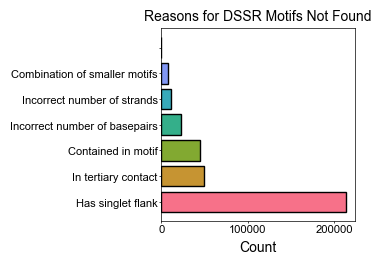

In [11]:
# Get value counts and sort in descending order
reason_counts = df_dssr["reason"].value_counts()

# Create figure and axis
fig, ax = plt.subplots(figsize=(2.5, 2.5))

# Create horizontal bar plot with different colors
colors = sns.color_palette("husl", n_colors=len(reason_counts))
bars = ax.barh(
    range(len(reason_counts)), reason_counts.values, color=colors, edgecolor="black"
)

# Customize plot
ax.set_yticks(range(len(reason_counts)))
ax.set_yticklabels(reason_counts.index)
ax.set_xlabel("Count")
ax.set_title("Reasons for DSSR Motifs Not Found")
ax.tick_params(axis="y", length=0)

publication_style_ax(ax)

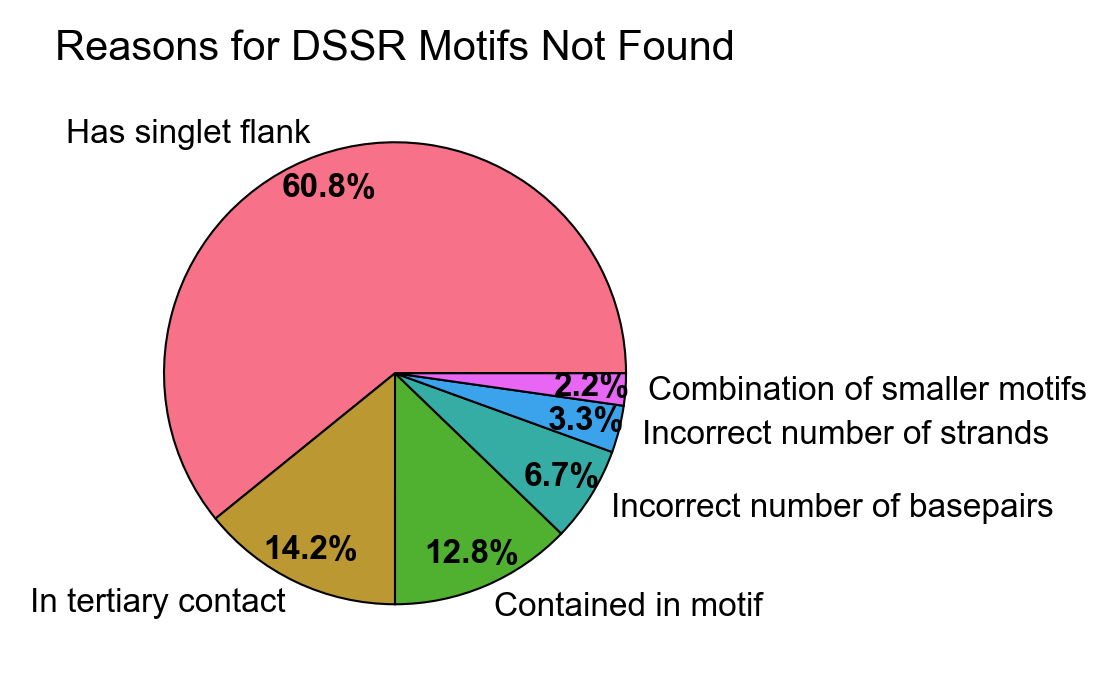

In [26]:
# Get value counts and sort in descending order
reason_counts = df_dssr["reason"].value_counts()

# Filter out values less than 0.2%
total = reason_counts.sum()
reason_counts = reason_counts[reason_counts / total >= 0.002]

# Create figure and axis
fig, ax = plt.subplots(figsize=(2.5, 2.5), dpi=300)

# Create pie chart with different colors
colors = sns.color_palette("husl", n_colors=len(reason_counts))
wedges, texts, autotexts = ax.pie(
    reason_counts.values,
    labels=reason_counts.index,
    colors=colors,
    autopct="%1.1f%%",
    pctdistance=0.85,
    wedgeprops=dict(edgecolor="black", linewidth=0.5),
)

# Customize plot
plt.setp(autotexts, size=6, weight="bold", fontname="Arial")
plt.setp(texts, size=6, fontname="Arial")
ax.set_title("Reasons for DSSR Motifs Not Found", fontname="Arial")

publication_style_ax(ax)

In [69]:
print(df_dssr["reason"].value_counts())

Has singlet flank                207160
Incorrect number of basepairs     98601
In tertiary contact               45634
Contained in motifs               37763
Incorrect number of strands       10801
Overlapping motifs                 6494
Name: reason, dtype: int64


In [54]:
df_dssr["correct_n_strands"].value_counts()

True     395652
False     10801
Name: correct_n_strands, dtype: int64

In [55]:
df_dssr["correct_n_basepairs"].value_counts()

True     306183
False    100270
Name: correct_n_basepairs, dtype: int64

In [56]:
df_dssr["has_singlet_flank"].value_counts()

True     237579
False    168874
Name: has_singlet_flank, dtype: int64

In [57]:
df_dssr["in_tc"].value_counts()

0.0    243664
1.0    162789
Name: in_tc, dtype: int64

In [58]:
df_dssr["n_contained_in_motifs"].value_counts()

1    295343
0    111110
Name: n_contained_in_motifs, dtype: int64

In [59]:
df_dssr_no_explained = df_dssr.query(
    "correct_n_strands == True and correct_n_basepairs == True and has_singlet_flank == False and in_tc == False and n_contained_in_motifs == 0"
).copy()

In [60]:
len(df_dssr_no_explained)

6494

In [61]:
df_dssr_no_explained["mtype"].value_counts()

HELIX      4969
TWOWAY     1065
HAIRPIN     225
NWAY        131
SSTRAND     104
Name: mtype, dtype: int64

In [63]:
df_dssr_no_explained["n_overlapping_motifs"].value_counts()

4     2165
2     1686
3     1683
5      889
6       41
7       24
13       4
9        1
8        1
Name: n_overlapping_motifs, dtype: int64

In [62]:
for i, row in df_dssr_no_explained.iterrows():
    print(row)
    break

pdb_id                                                                8P18
motif                                         HELIX-UGUGGAC-GUCUGCA-8P18-1
mtype                                                                HELIX
n_strands                                                                2
n_basepairs                                                              7
n_basepair_ends                                                          2
n_residues                                                              14
residues                 [1-U-2137-, 1-G-2138-, 1-U-2139-, 1-G-2140-, 1...
correct_n_strands                                                     True
correct_n_basepairs                                                   True
has_singlet_flank                                                    False
found                                                                False
misclassified                                                        False
missing                  